In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
insurance=pd.read_csv("insurance.csv")

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
insurance["log_charges"]=np.log2(insurance["charges"])
insurance.corr()

,age,bmi,children,charges,log_charges
age,1.000000,0.109272,0.042469,0.299008,0.527834
bmi,0.109272,1.000000,0.012759,0.198341,0.132669
children,0.042469,0.012759,1.000000,0.067998,0.161336
charges,0.299008,0.198341,0.067998,1.000000,0.892964
log_charges,0.527834,0.132669,0.161336,0.892964,1.000000


There is a "higher" correlation between age and charges. Also, it is less higher but significant the correlation between bmi and charges. I decided to do the log of the charges because the charges column is highly right skewed.

<Figure size 2400x6000 with 0 Axes>

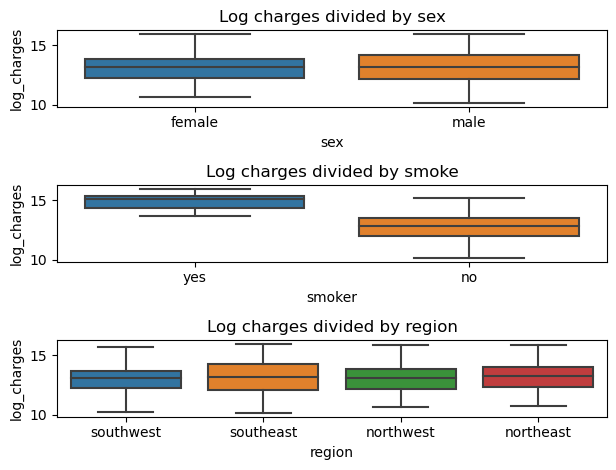

In [8]:
plt.figure(figsize=(24,60))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("relationships between the potential predictor variables with the outcome", fontsize=18, y=0.95)
fig,(ax1, ax2, ax3)=plt.subplots(3)
sns.boxplot(x=insurance["sex"], y=insurance["log_charges"], ax=ax1)
sns.boxplot(x=insurance["smoker"], y=insurance["log_charges"], ax=ax2)
sns.boxplot(x=insurance["region"], y=insurance["log_charges"], ax=ax3)
ax1.set_title("Log charges divided by sex")
ax2.set_title("Log charges divided by smoke")
ax3.set_title("Log charges divided by region")
fig.tight_layout()
plt.show()
                

The predictors that we should use for the analysis are: "age", "sex", "smoker" and "bmi".

In [17]:
insurance["sex"]=insurance["sex"].replace(["female","male"], [0,1])
insurance["smoker"]=insurance["smoker"].replace(["no","yes"], [0,1])
X=insurance[["age","sex","smoker","bmi"]]
y=insurance["log_charges"]
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=417)

In [19]:
model=LinearRegression()
model.fit(X_train, y_train)
sc=r2_score(y_train, model.predict(X_train))

In [20]:
sc

0.7364793861791522

In [21]:
mse=mean_squared_error(y_train, model.predict(X_train))
mse

0.4701861978033465

The model presents a good R^2 score: 0,736. Also the mse is not so high related to the variable we are analysing. 

In [24]:
prediction=model.predict(X_train)
residuals=y_train-prediction

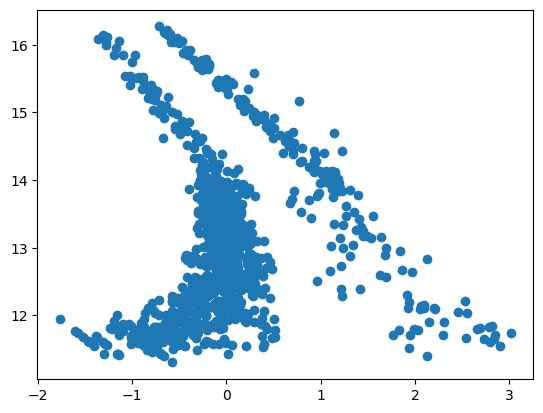

In [25]:
plt.scatter(residuals, prediction)
plt.show()

The graph above doesn't show a linearity of the data but it seems that as fitted values go up, residual values tends to go down. 

In [27]:
intercept=model.intercept_
intercept

10.233012319893477

The individual medical costs billed by health insurance is 10.23 when we have a female/no-smoker patient (considering 0 age and bmi).

In [28]:
coef=model.coef_
coef

array([ 0.04974974, -0.10011733,  2.26542019,  0.01735069])

If the patient is male the value decreases of -0.10. And if it's a smoker the value increases of 2.26.

In [29]:
mse=mean_squared_error(y_test, model.predict(X_test))
mse

0.35385895518532484

The value is less than the one we have seen before for the training one. so, this is a good sign that our model should work with all the data (not only the one we used to train it).


The model makes sense for several reasons. Looking at the coefficients it goes up when the bmi grows, when it's a smosker and when the subject is older. The model predicts lower costs for people charged much higher. The mse is not high so the difference between real data and predicted ones is not so high. Even though, the model could be improved. 